In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

In [2]:
ars_path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/equal_extent_data_downsize/nc/20*/*int.nc'
ars_topo_path = '/home/meganmason/Documents/projects/thesis/maps/map_layers/basin_ops/tuolumne/topo/basin_setup/topo.nc'

path = ars_path

In [3]:
#filepath list, lidar
flist = sorted(glob.glob(path))

# Parse dates, store as pandas datetime type in list
fparse = [d.split('/')[-1] for d in flist] #splits fname on '/' saves last
fparse = [d.split('_')[0] for d in fparse] #splits fname on '_' saves first

# flight dates, parsed from filename
dates = pd.to_datetime(fparse) #pandas datetime variable, lidar dates

In [4]:
flist = flist[:6] #first 6 are just 2013
dates = dates[:6]

In [5]:
#load xarray, via multiple files
# ds=xr.open_mfdataset(flist, concat_dim='time',chunks={'x':1000, 'y':1000}).rename({'Band1' : 'snow'}, inplace=True) #dataset
ds=xr.open_mfdataset(flist, concat_dim='time', combine='nested', chunks={'x':1000, 'y':1000}, parallel=True).rename({'Band1':'snow'})
ds.close()

ds = ds.drop('transverse_mercator') #remove
ds=ds.astype(np.int16, copy=False) #cast as int16 (32,767)
ds['time'] = (['time'], dates) #add 'time' coordinate, default populates with dimension called 'time'
# ds['snow'].values = ds.snow[::-1] # flip along y-axis (maybe do that as function, call: preprocess= <func_name> in open_mfds())
# ds


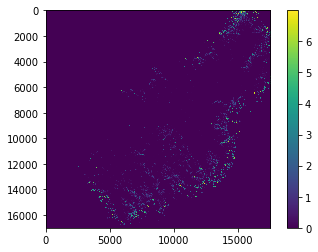

In [6]:
plt.figure()
# plt.imshow(ds.isel(time=1).snow)
plt.imshow(ds.snow[5]/1000)
plt.colorbar()
plt.show()